In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.compose import make_column_selector, make_column_transformer

In [123]:
filename = 'downloads/train-2.csv'
df = pd.read_csv(filename)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [234]:
#The dataset has no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [127]:
df['Credit_Score'] = df['Credit_Score'].replace({'Poor':0, 'Standard':1, 'Good':2})
df['Credit_Mix'] = df['Credit_Mix'].replace({'Bad':0, 'Standard':1, 'Good':2})
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,2,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,2
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,2,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,2
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,2,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,2
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,2,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,2
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,2,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,2


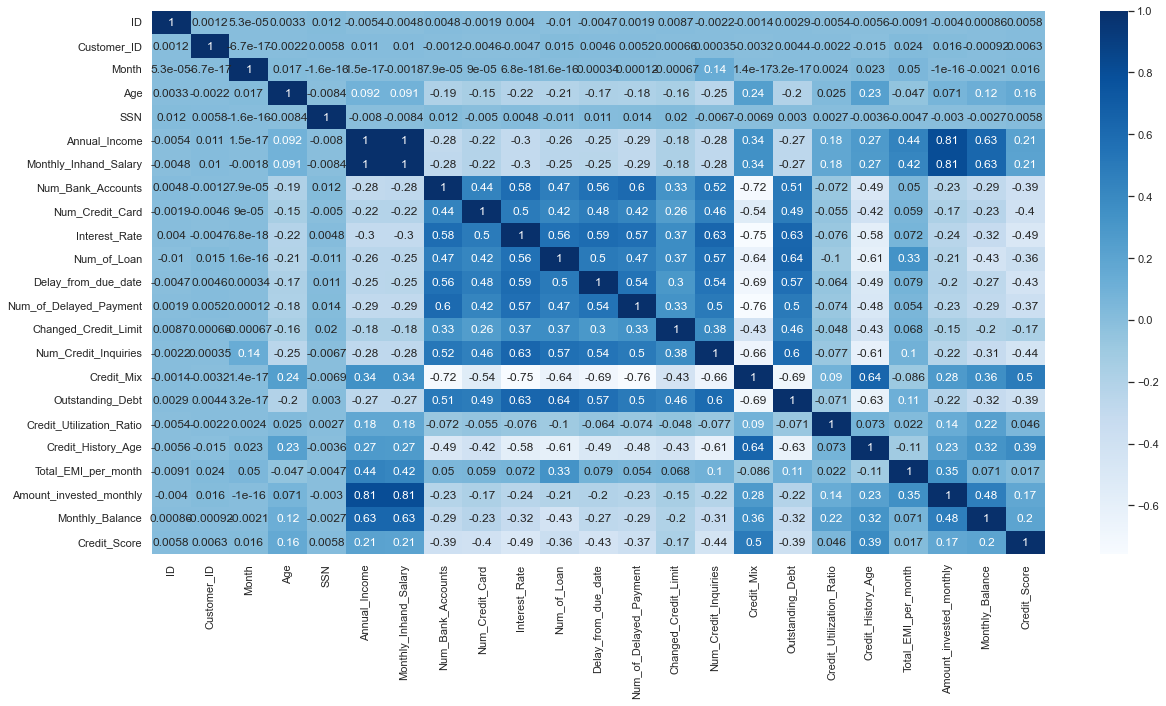

In [150]:
#Heatmap of the correlation between features.

corr = df.corr()

import seaborn as sns
sns.heatmap(corr, cmap = 'Blues',annot =True)
sns.set(rc = {'figure.figsize':(20,12)})         

In [151]:
# The above heatmap shows there is a high positive correlation between Credit_score and features like Credit_mix and Credit_history_age
# There is also a high negative correlation between Credit_score and features like Outstanding Debt, Num_credit_inquiries
# Num_of Delayed_Payment, Delay_from_due_date, Num_of_loan, Interest_rate, Num_credit_card and Num_Bank_accounts. 

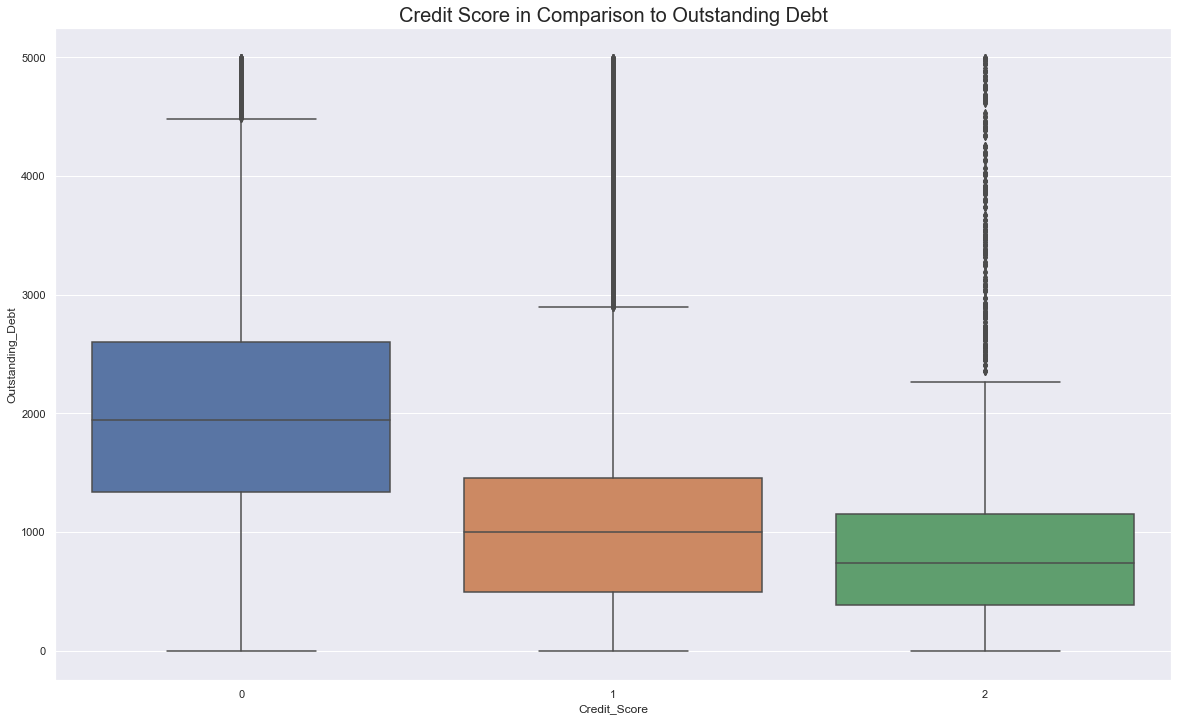

In [163]:
sns.boxplot(x='Credit_Score', y='Outstanding_Debt',data=df);
plt.title('Credit Score in Comparison to Outstanding Debt', fontsize=20);


In [164]:
# The box plot above shows that those with a credit score of 0 (Poor) have an outstanding debt of about 2,000.  
# According to the interquartile range (IQR) it ranges between 1500 and 2500.

# Those with a credit score of 1 (Standard) have an outstanding debt that ranges from 500 to 1500 according to the
#interquartile range. While as those with a credit score of 2 (Good) have an outstanding debt that ranges from 400
# to 1200. 

#However all these classes have outliers with an outstanding debt of 5000. 


/Users/kahuma/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


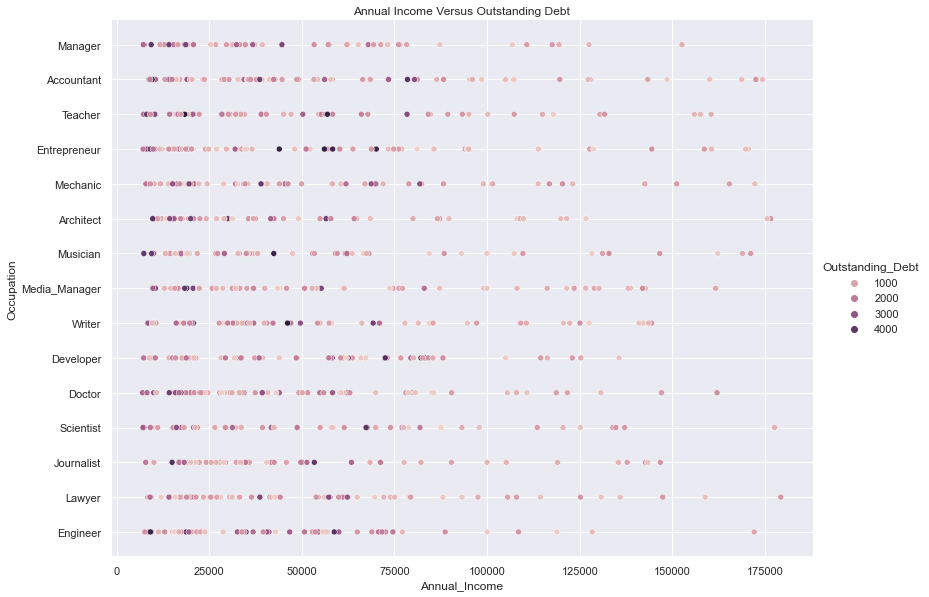

In [166]:
#Using sample data of 1000 to avoid overplotting 
df_sample = df.sample(1000)
sns.relplot(df_sample['Annual_Income'],df_sample['Occupation'], hue = df_sample['Outstanding_Debt'],height=8.27, aspect=11.7/8.27).set(title='Annual Income Versus Outstanding Debt' );


In [ ]:
# Those who earn over 100,000 annually have an outstanding debt of less than 2,000 while as those who earn less, 
# have outstanding debts of upto 4000.Scientists, lawyers and architect are the only outliers who earned over 
# 175,000 annually

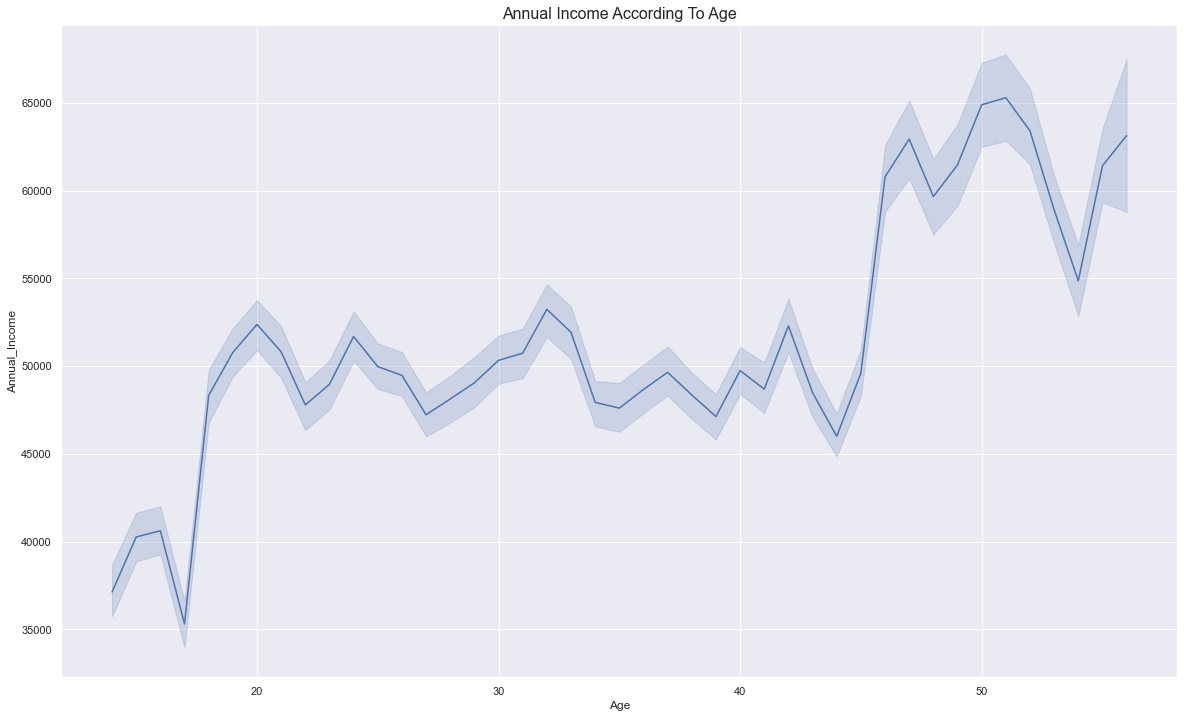

In [167]:
# Line Plot Visualization 
sns.lineplot(
    x=df['Age'], 
    y=df['Annual_Income']);
sns.set(rc={'figure.figsize':(10,8)}, font_scale=2.5, style='whitegrid')
plt.title('Annual Income According To Age', fontsize = 16);

In [168]:
# According to the line graph above the lowest income earners are below the age of 20 and majority of those earn 
# less than 40,000 usd annually. The highest earners are between the age of 45 and 52, earning over 50,000 usd 
# annually. There are outliers below the age of 20 who earn more than 50,000 usd annually. 
# For the age group of 50 and above, the lowest earner gets about 52,000 usd annually.

In [169]:
#Splitting the data 
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [170]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [171]:
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [172]:
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [173]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f85fb460850>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8f2805f460>)])

In [174]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f85fb460850>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8f2805f460>)])

In [175]:
# Transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [176]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
# encode labels
encoder = LabelEncoder()
 
encoder.fit(y_train)
y_train_enc = encoder.transform(y_train)
y_test_enc = encoder.transform(y_test)
 
# make a record of the classes, in order of the encoding, in case we want to 
# translate predictions into credit score names later.
classes = encoder.classes_
 
# binarize labels
binarizer = LabelBinarizer()
 
binarizer.fit(y_train_enc)
y_train_bin = binarizer.transform(y_train_enc)
y_test_bin = binarizer.transform(y_test_enc)
 
# check results
print('Original Target')
print(y_train.head())
 
print('\nEncoded Target')
print(y_train_enc[:5])
 
print('\nBinarized Target')
print(y_train_bin[:5])

Original Target
98980    1
69824    0
9928     1
75599    0
95621    0
Name: Credit_Score, dtype: int64

Encoded Target
[1 0 1 0 0]

Binarized Target
[[0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]]


In [222]:
# create model architecture
 
# define some parameters
input_dim = X_train_processed.shape[1]
num_classes = len(classes)
 
# instantiate the base model
multi_model = Sequential()
 
# add layers
multi_model.add(Dense(30, input_dim=input_dim, activation='relu'))
multi_model.add(Dropout(.3))
multi_model.add(Dense(30, activation='relu'))
multi_model.add(Dropout(.3))
multi_model.add(Dense(num_classes, activation='softmax'))
multi_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 30)                493080    
                                                                 
 dropout_20 (Dropout)        (None, 30)                0         
                                                                 
 dense_31 (Dense)            (None, 30)                930       
                                                                 
 dropout_21 (Dropout)        (None, 30)                0         
                                                                 
 dense_32 (Dense)            (None, 3)                 93        
                                                                 
Total params: 494,103
Trainable params: 494,103
Non-trainable params: 0
_________________________________________________________________


In [223]:
# compiling model with categorical_crossentropy
 
multi_model.compile(loss='categorical_crossentropy', 
                    optimizer='adam', 
                    metrics=['accuracy',
                             metrics.Precision(),
                             metrics.Recall()])

In [224]:
# fit model
 
history = multi_model.fit(X_train_processed, y_train_bin,
                          validation_data=(X_test_processed, y_test_bin),
                          epochs=100,
                          verbose=0)

In [225]:
# Learning history plotting function

def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

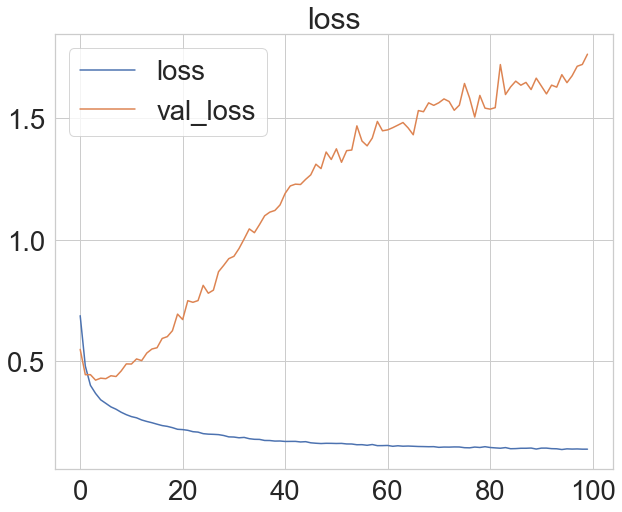

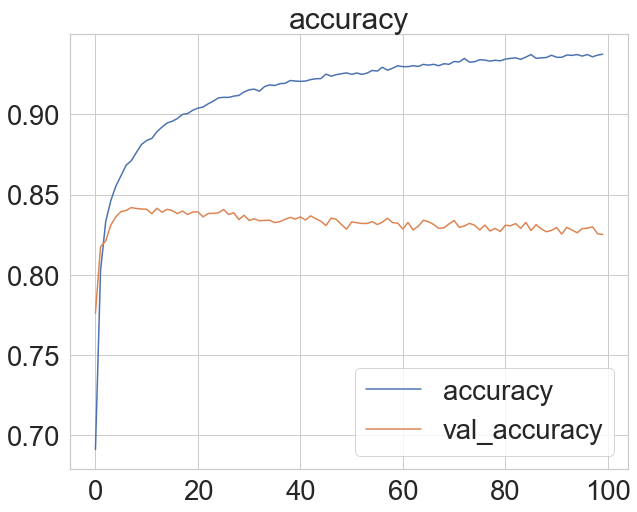

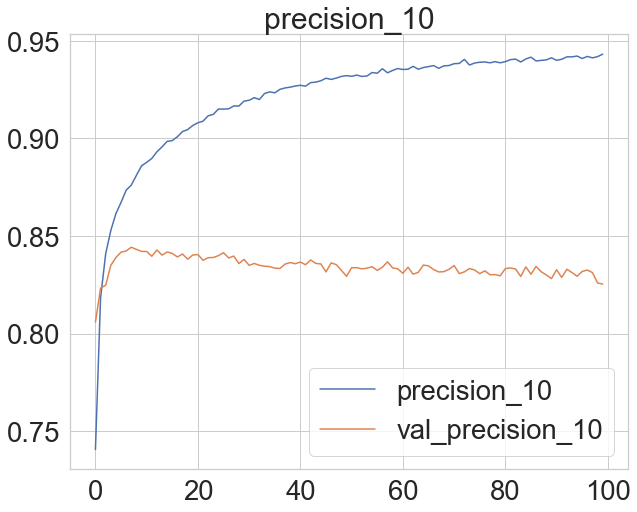

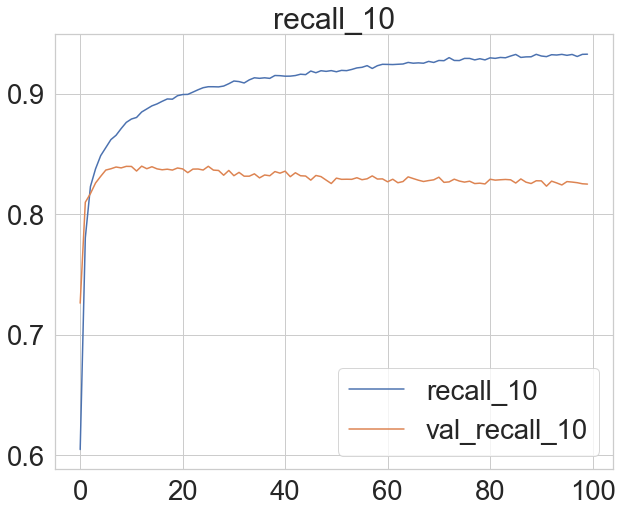

In [226]:
# plot learning history
plot_history(history)

In [227]:
# The above graphs show us that the training data isn't far off the testing data with a difference of about 0.1


In [228]:
# get raw predictions
raw_pred = multi_model.predict(X_test_processed)
 
# display predictions and binarized true labels
print('Raw Predictions\n', raw_pred[:5])
print('\nbinarized y_test\n', y_test_bin[:5])

782/782 [==============================] - 2s 2ms/step
Raw Predictions
 [[2.9530029e-21 2.8045263e-06 9.9999714e-01]
 [9.9743348e-01 2.5665066e-03 2.7053847e-38]
 [4.1069863e-11 9.9863154e-01 1.3684572e-03]
 [9.9523300e-01 4.7669490e-03 4.5354663e-34]
 [0.0000000e+00 2.1416808e-07 9.9999976e-01]]

binarized y_test
 [[0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]]


In [229]:
# convert predictions and labels into integers representing each credit class.
y_pred = np.argmax(raw_pred, axis=1)
y_true = np.argmax(y_test_bin, axis=1)
 
print('integer predictions', y_pred)
print('integer true labels', y_true)

integer predictions [2 0 1 ... 0 0 1]
integer true labels [2 0 2 ... 0 0 1]


              precision    recall  f1-score   support

           0       0.82      0.81      0.82      7313
           1       0.84      0.83      0.84     13265
           2       0.80      0.82      0.81      4422

    accuracy                           0.83     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.83      0.83      0.83     25000



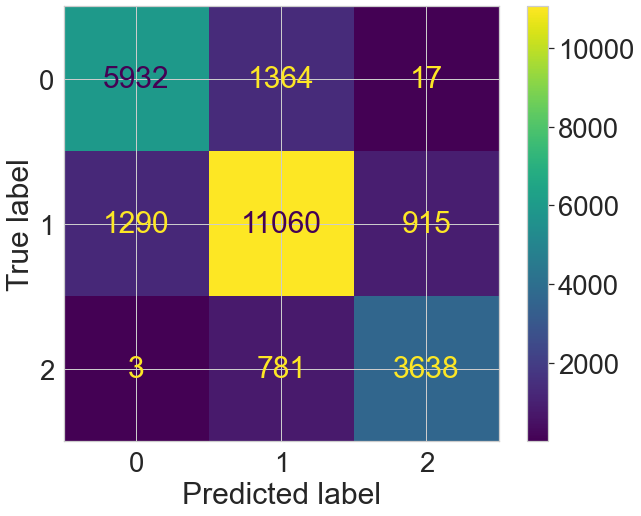

In [230]:
# printing classification report and confusion matrix
 
print(classification_report(y_true, y_pred))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                        display_labels=classes);
                                        

In [231]:
#Checking for classes and balance
y_test.value_counts()

1    13265
0     7313
2     4422
Name: Credit_Score, dtype: int64

In [232]:
#The model was able to accurately predict 83% of the credit score. However the model was able to predict the standard class
#better because of the class imbalance in the data provided. 


In [233]:
#Seeing how the predictions compare to the original values. 

prediction_df = X_test.copy()
prediction_df['True Credit'] = y_true
prediction_df['Predicted Credit'] = y_pred

prediction_df.head()



,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,True Credit,Predicted Credit
75721,119215,13625,2,an Arakalid,30.0,995314669.0,Manager,43391.96,3688.996667,1.0,...,1468.28,29.112468,284.0,No,0.000000,47.438673,High_spent_Large_value_payments,554.930282,2,2
80184,125910,34582,1,Matthewz,18.0,185998068.0,Scientist,14351.21,1274.934167,8.0,...,4766.87,39.849732,98.0,Yes,61.098718,21.200962,Low_spent_Small_value_payments,238.314485,0,0
19864,35430,8668,1,Tom Miless,41.0,241538475.0,Developer,130125.04,10871.753333,5.0,...,1195.05,21.542892,191.0,No,204.285650,103.431653,Low_spent_Small_value_payments,271.756987,2,1
76699,120681,13011,4,Lisaa,35.0,204786176.0,Manager,20107.21,1631.600833,6.0,...,2544.60,32.423759,232.0,Yes,27.106395,10.917189,Low_spent_Small_value_payments,359.233914,0,0
92991,145117,44461,8,Masond,27.0,27116852.0,Doctor,92186.19,7487.182500,1.0,...,809.01,39.543131,249.0,No,185.797654,84.280516,High_spent_Medium_value_payments,697.400557,2,2
